# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

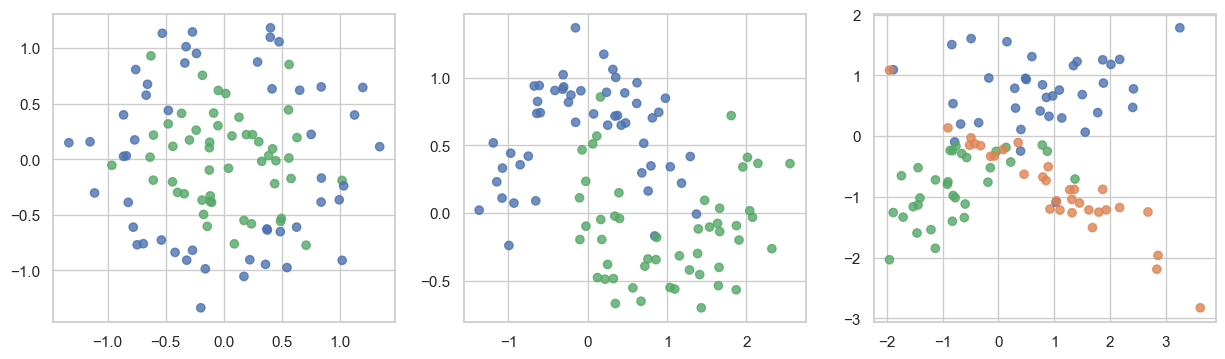

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

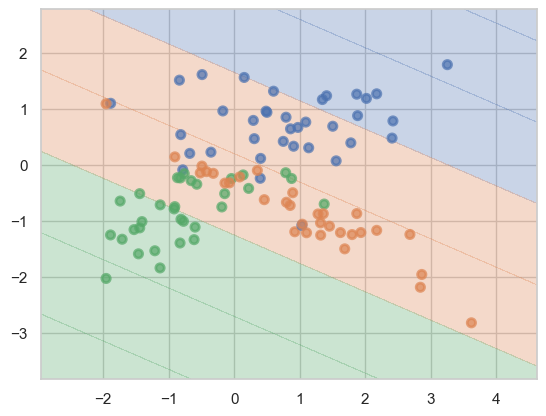

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

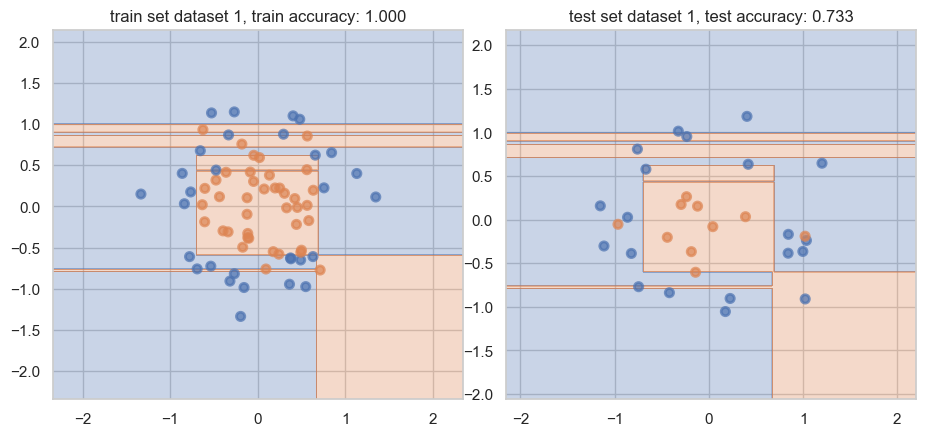

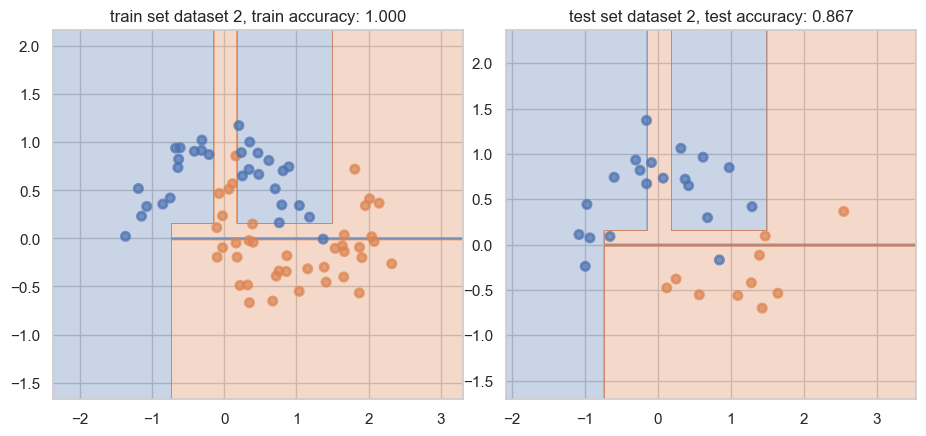

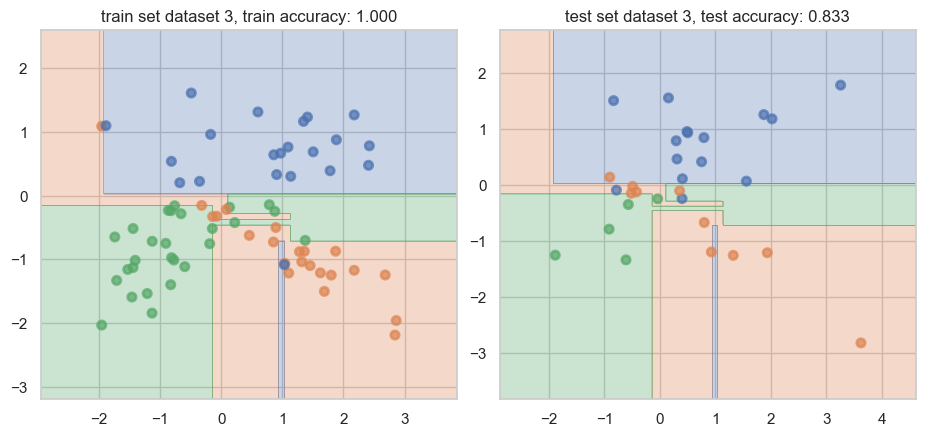

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    #clf = DecisionTreeRegressor(random_state=42)
    # #regressor или classifier?
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plot_surface(clf, X_train, y_train)
    plt.title(f"train set dataset {i + 1}, train аccuracy: {train_accuracy:.3f}")

    plt.subplot(1, 2, 2)
    plot_surface(clf, X_test, y_test)
    plt.title(f"test set dataset {i + 1}, test аccuracy: {test_accuracy:.3f}")
    plt.show()
    #print(f"train accuracy: {train_accuracy:.3f}")
    #print(f"test accuracy: {test_accuracy:.3f}\n")

__Ответ:__ Деревья достаточно сильно переобучаются - accuracy на обучающей выборке идеальное, а на тестовой падает на 15-20%. Если ориентироваться по картинкам, то если область выделена в обучающей, она может вообще отсуствовать в тестовой 

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

Dataset 1


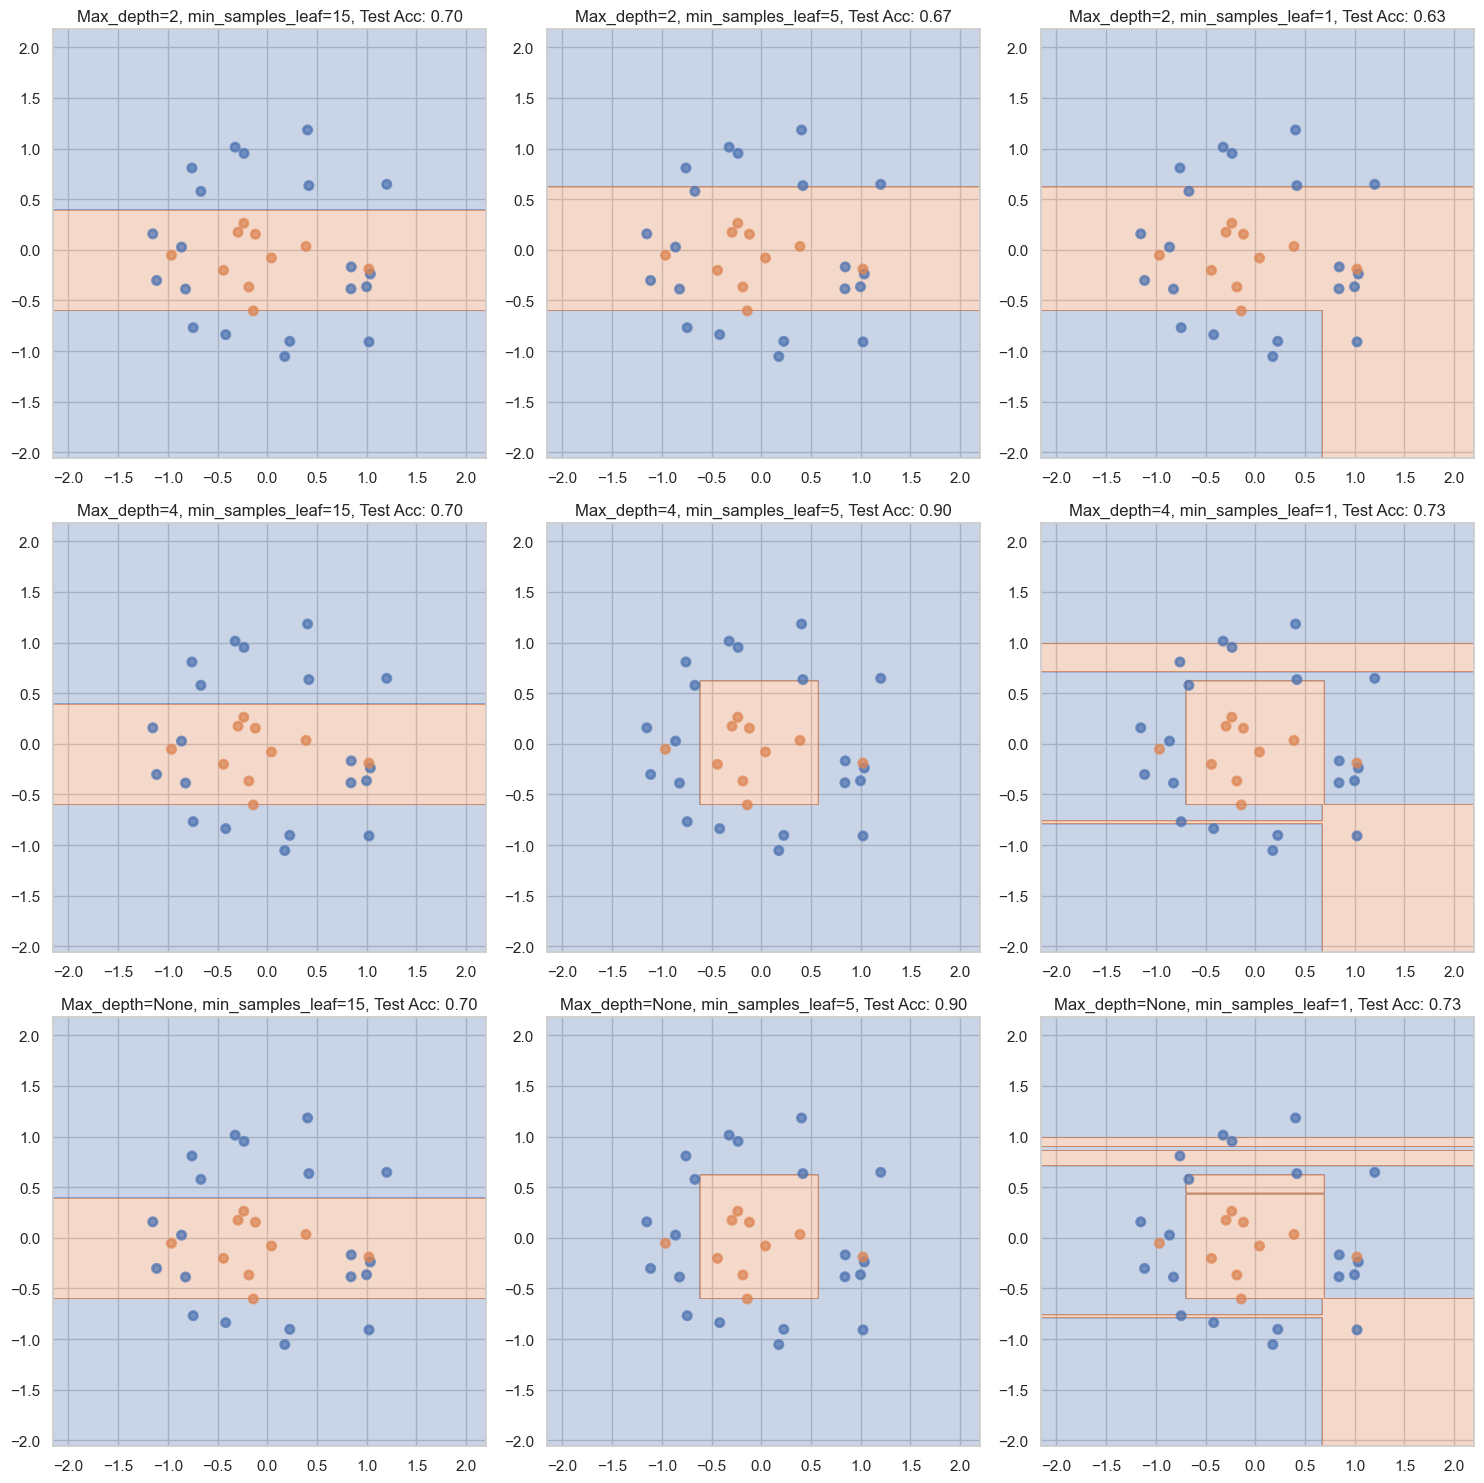

Dataset 2


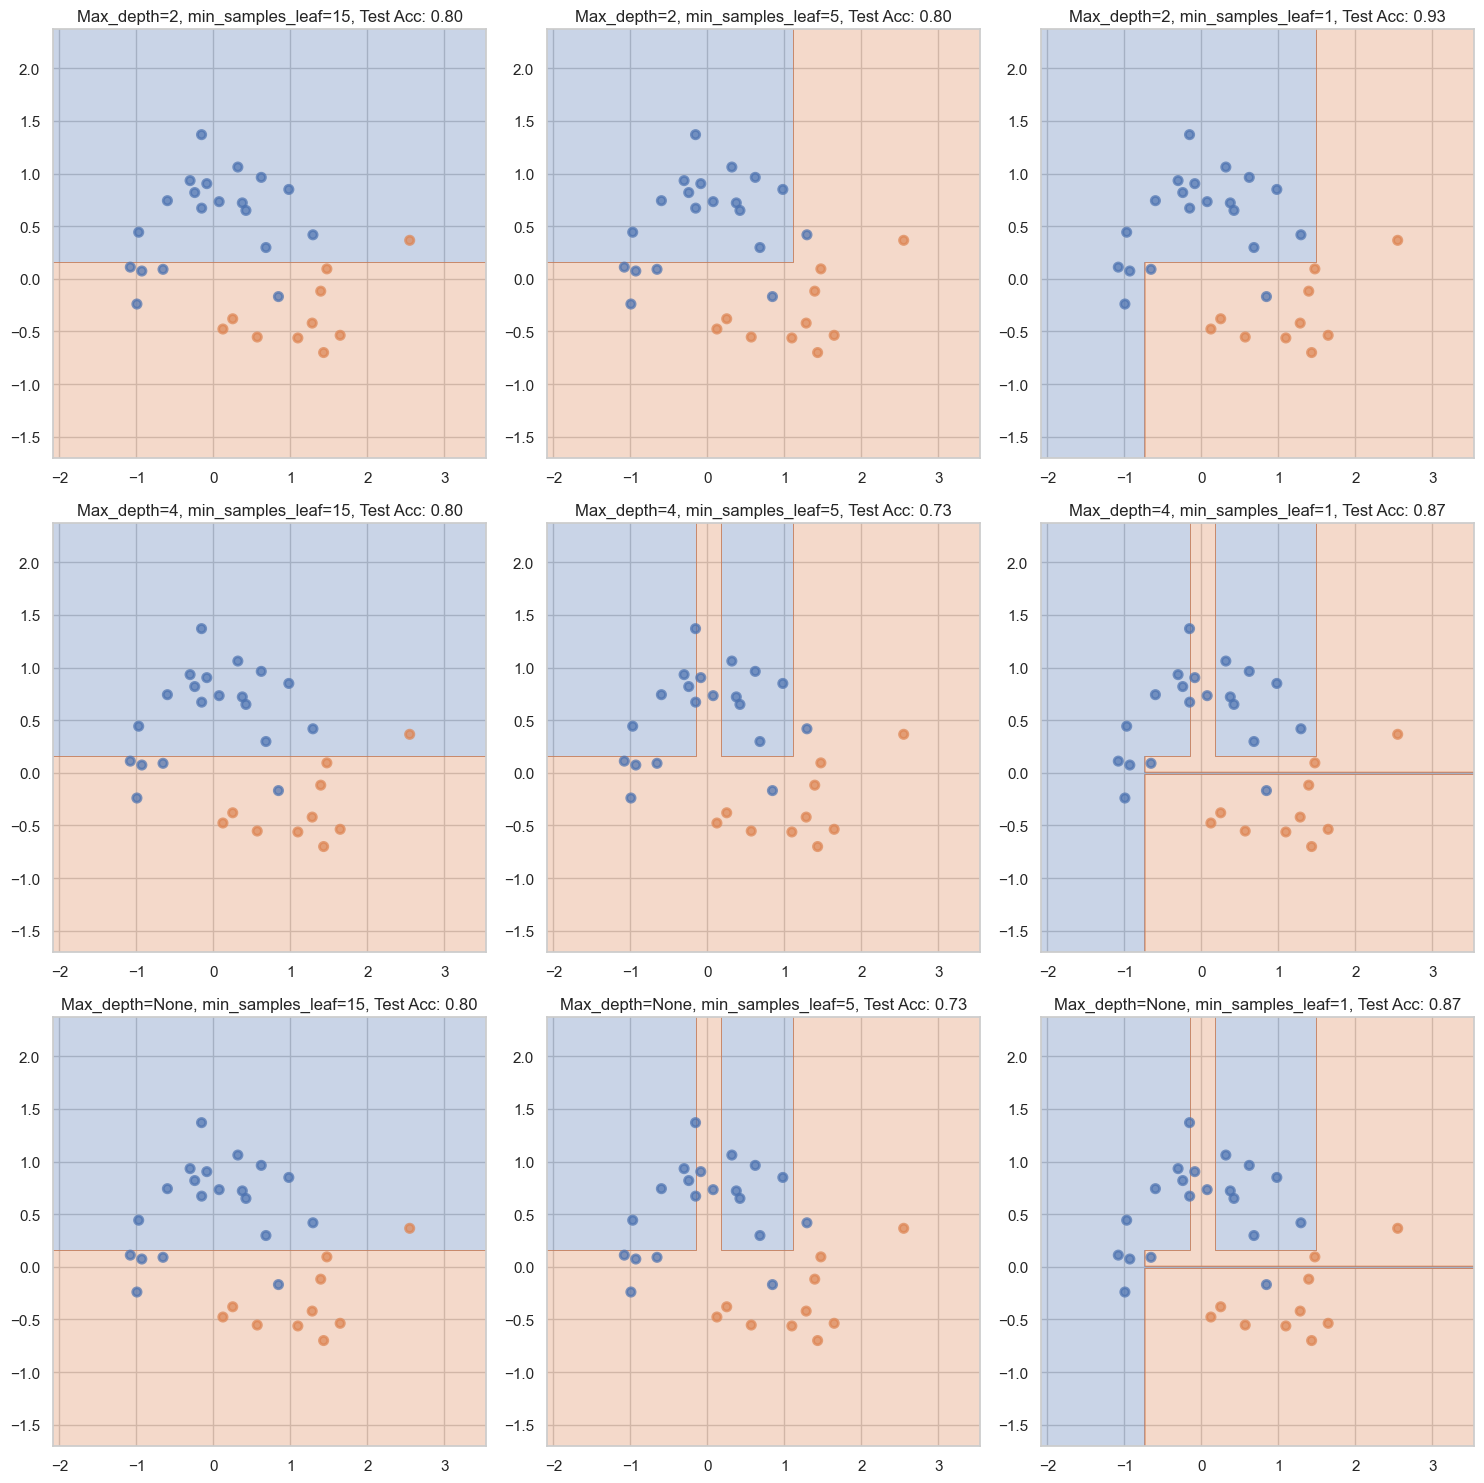

Dataset 3


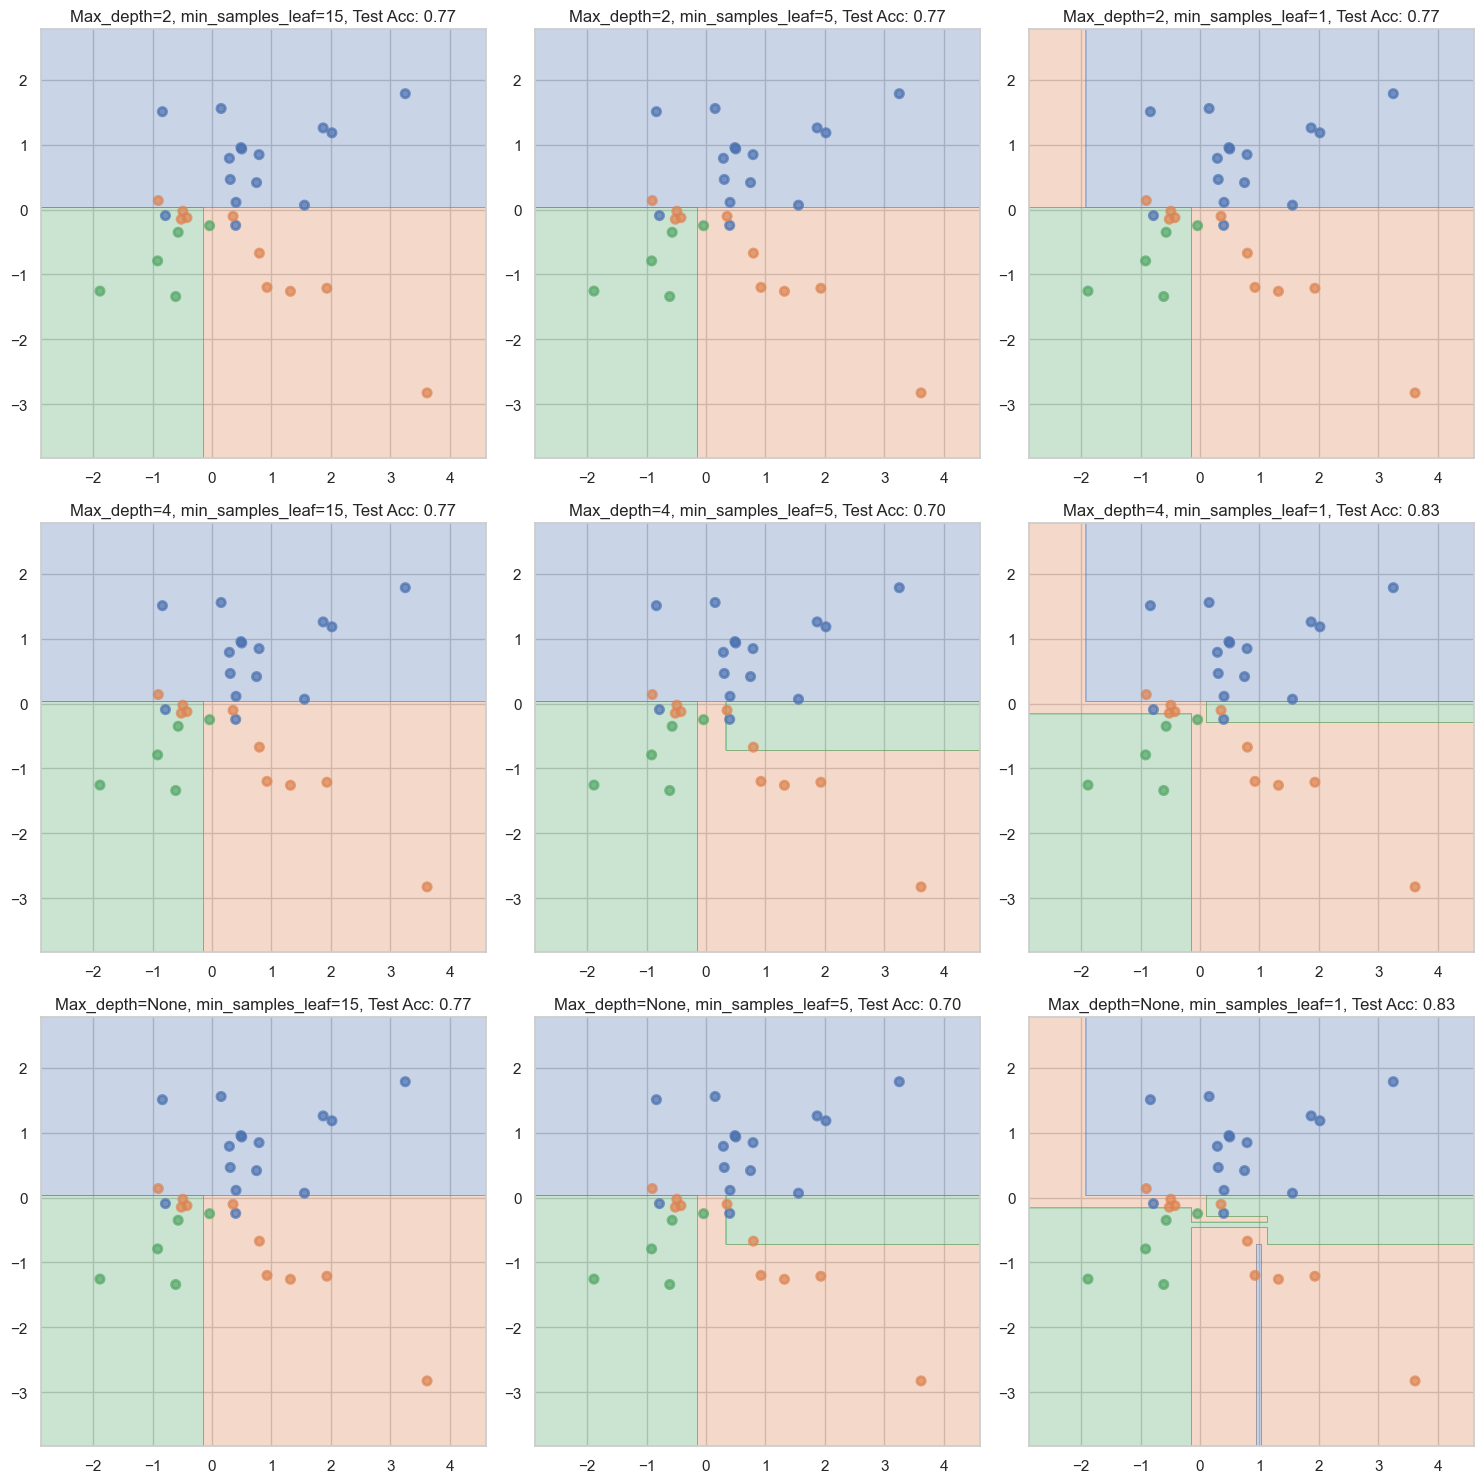

In [8]:
random_state = 42

for k, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    plt.figure(figsize=(15, 5 * len([2, 4, None])))
    print(f'Dataset {k+1}')
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=random_state)
            clf.fit(X_train, y_train)
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            plt.subplot(len([2, 4, None]), len([15, 5, 1]), i * len([15, 5, 1]) + j + 1)
            plot_surface(clf, X_test, y_test)
            plt.title(f"Max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, Test Acc: {test_accuracy:.2f}")
        
    plt.tight_layout() 
    plt.show()

__Ответ:__ В целом, чем выше глубина дерева и чем меньше количество элементов в одном листе, тем сильнее переобучается дерево (и тем сильнее падает обобщающая способность). Особенно хорошо это видно по последним "строкам" для каждого датасета - выведенное разделение плоскости достаточно плохо обобщает данные для тестовой выборки. Судя по метрике на тесте, хуже всего получается с первым датасетом - требуется достаточно большая глубина дерева для наилучшего результата. 

**Бонус**

*Не получилось дописать*

In [9]:
import plotly.graph_objects as go

def get_decision_surface(clf, X, y):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

def create_plot(X_train, y_train, X_test, y_test, max_depth_values, min_samples_leaf_values):
    frames = []
    steps_depth = []
    steps_leaf = []
    for i, max_depth in enumerate(max_depth_values):
        for j, min_samples_leaf in enumerate(min_samples_leaf_values):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            xx_train, yy_train, Z_train = get_decision_surface(clf, X_train, y_train)
            xx_test, yy_test, Z_test = get_decision_surface(clf, X_test, y_test)
            frame = go.Frame(
                name=frame_name,
                data=[
                    go.Scatter(x=X_train[:, 0], y=X_train[:, 1], mode="markers", marker=dict(size=10, color=y_train, colorscale="Viridis", line=dict(width=0.5)),
                        xaxis="x",yaxis="y"),
                    go.Scatter(x=X_test[:, 0], y=X_test[:, 1], mode="markers", marker=dict(size=10, color=y_test, colorscale="Cividis", line=dict(width=0.5)),
                        xaxis="x2",yaxis="y2"),
                    #go.Contour()
                ],
            )
            frames.append(frame)

max_depth_values = [i for i in range(1, 10)]
min_samples_leaf_values = [i for i in range(1, 10)]


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

Ссылка на посылку: https://contest.yandex.ru/contest/72492/run-report/129623609/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
from hw5code import find_best_split 

data = pd.read_csv('students.csv') 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


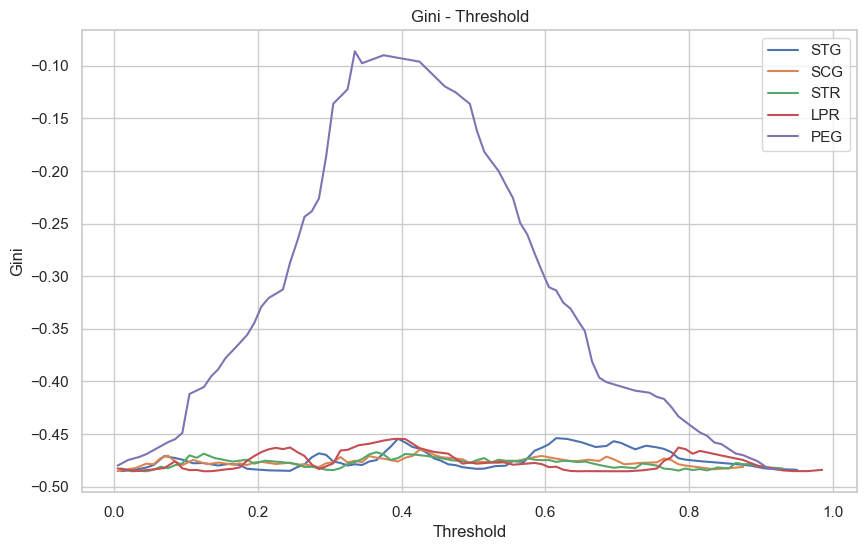

In [12]:
plt.figure(figsize=(10, 6))  
features = X.columns.values

for feature in features:
    thresholds, ginis, _ , _ = find_best_split(np.array(data[feature]), np.array(data.iloc[:, -1]))
    plt.plot(thresholds, ginis, label=f"{feature}")

plt.xlabel("Threshold")
plt.ylabel("Gini")
plt.title("Gini - Threshold")
plt.legend()
plt.grid(True) 
plt.show()

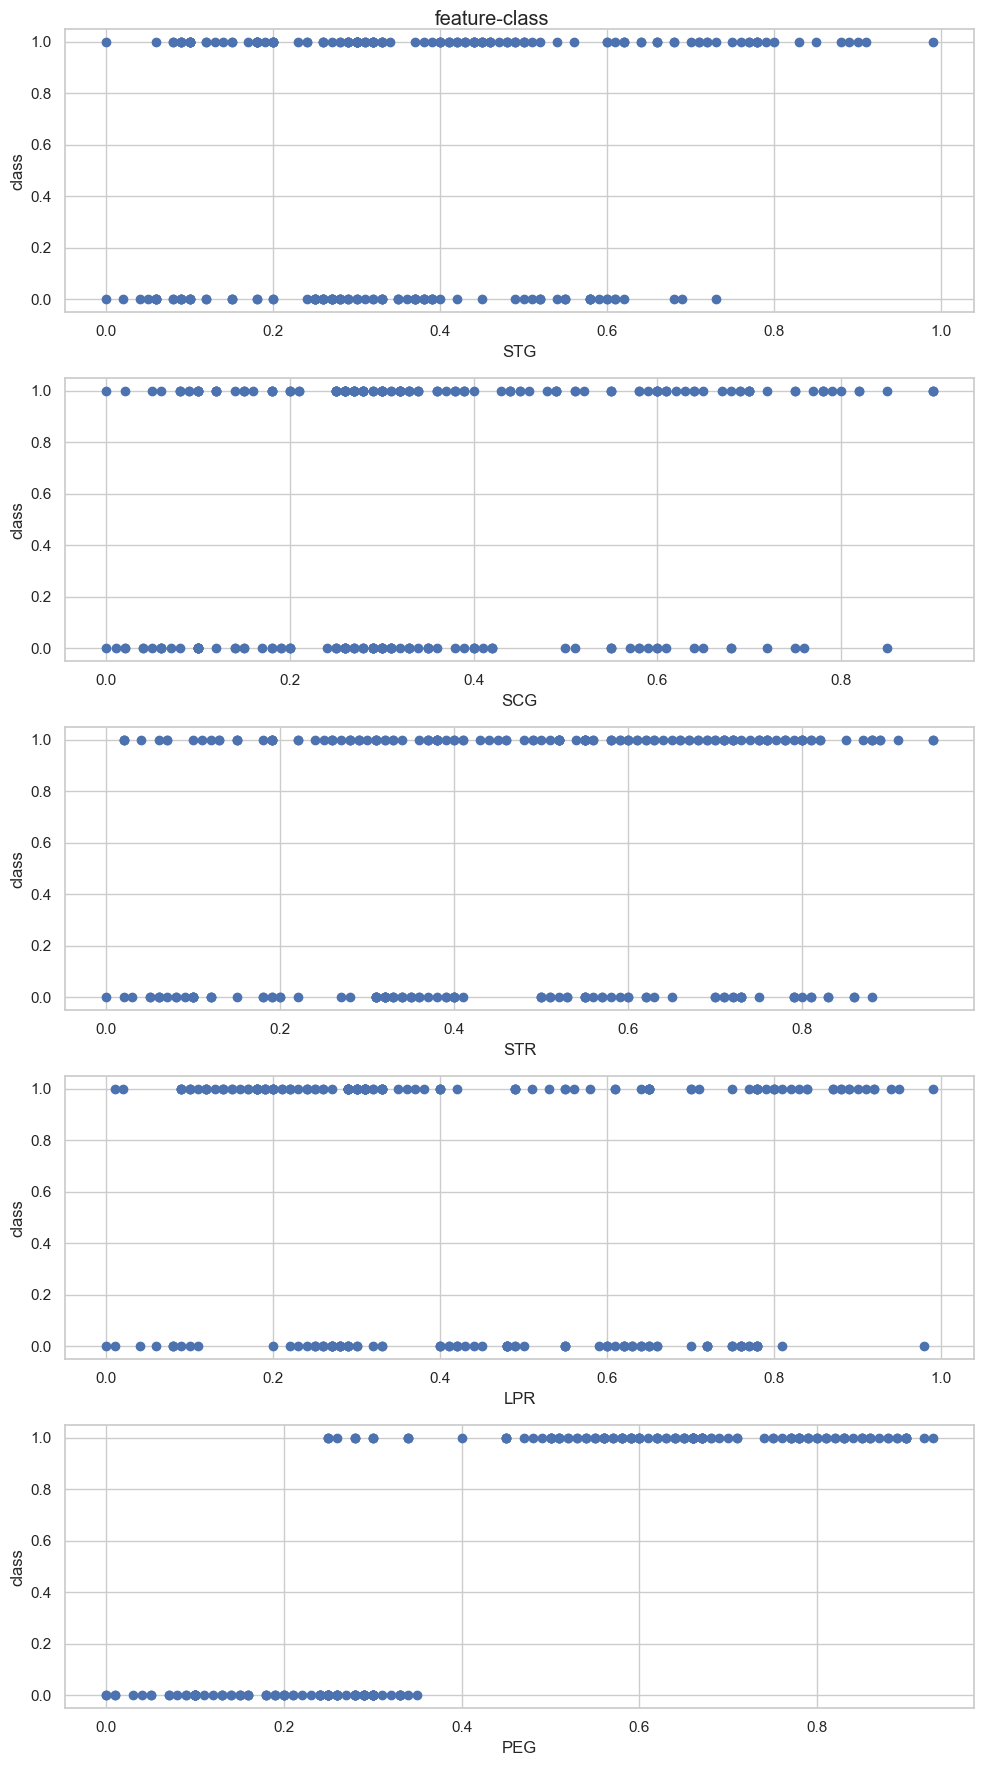

In [13]:
fig, ax = plt.subplots(5, 1, figsize=(10, 18))
plt.suptitle("feature-class")
for i, feature in enumerate(features):
    ax[i].scatter(X[feature], y)
    ax[i].set_xlabel(f"{feature}")
    ax[i].set_ylabel("class")

plt.tight_layout()
plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Деление выборки нужно производить по признаку PEG - это видно и по кривой значения Джини, и по scatter графиками. Для "хороших" признаков кривая должна иметь один глобальный экстремум (то есть быть выпуклой), тогда возможно хорошее разделение по порогу. В остальных признаках по этим двум графикам видно, что они содержат сильные колебания и кривая значений Джини скорее линейная, то есть при выборе любого порога мы не сможем сказать, к какому классу относится таргет

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

Ccылка на посылку: https://contest.yandex.ru/contest/72492/run-report/129623585/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
import os
current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, "agaricus-lepiota.data"))
data = pd.read_csv(file_path, header=None)
data.head()


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [16]:
from hw5code import DecisionTree as DecisionTreeMine
from sklearn.metrics import accuracy_score

X = data.iloc[:, 1:]
y = data.loc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.5, random_state=42) 

feature_types = ["categorical"] * X.shape[1] 
tree = DecisionTreeMine(feature_types) 
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f"Accuracy on test: {accuracy_score(y_test, y_pred)}")

Accuracy on test: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

In [17]:
tic_data = pd.read_csv("tic-tac-toe-endgame.csv")
tic_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [18]:
le = LabelEncoder()
for col in tic_data.columns:
    tic_data[col] = le.fit_transform(tic_data[col])

tic_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1


In [19]:
def plot_param_vs_accuracy(X_train, y_train, X_test, y_test, param_name, param_values):
    accuracies_test = []
    accuracies_train = []
    for value in param_values:
        tree = DecisionTreeMine(feature_types=["categorical"] * X_train.shape[1], **{param_name: value})
        tree.fit(np.array(X_train), np.array(y_train))
        y_pred = tree.predict(np.array(X_test))
        y_pred_train = tree.predict(np.array(X_train))
        accuracies_test.append(accuracy_score(y_test, y_pred))
        accuracies_train.append(accuracy_score(y_train, y_pred_train))
    plt.plot(param_values, accuracies_test, label="Test accuracy")
    plt.plot(param_values, accuracies_train, label="Train accuracy")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs. {param_name}")
    plt.legend()
    plt.show()

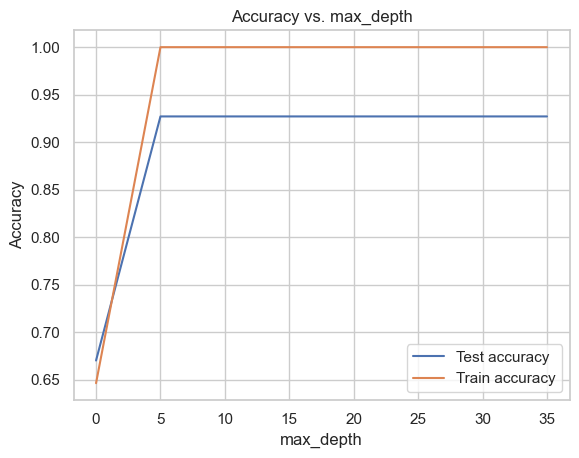

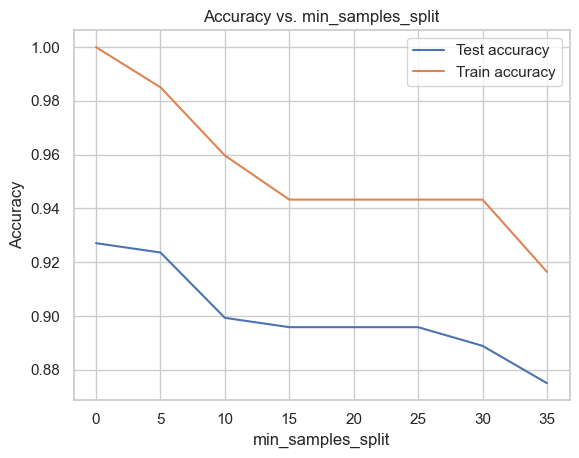

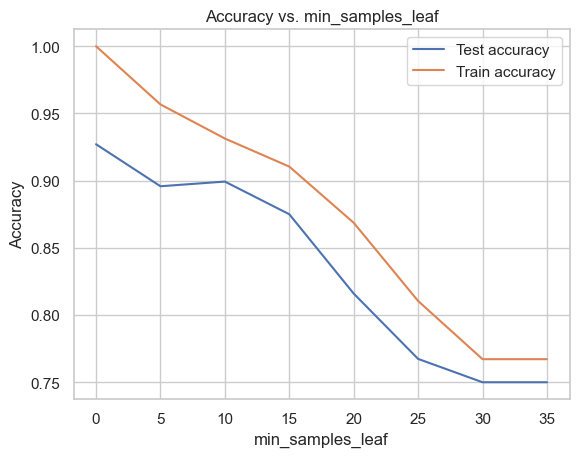

In [20]:
X = tic_data.iloc[:, :-1]
y = tic_data.iloc[:, -1] 
le = LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plot_param_vs_accuracy(X_train, y_train, X_test, y_test, "max_depth", range(0, 40, 5))
plot_param_vs_accuracy(X_train, y_train, X_test, y_test, "min_samples_split", range(0, 40, 5))
plot_param_vs_accuracy(X_train, y_train, X_test, y_test, "min_samples_leaf", range(0, 40, 5))

In [21]:
clf = DecisionTreeMine(["categorical"] * 9)
clf.fit(np.array(X_train), np.array(y_train))
y_pred = clf.predict(np.array(X_train))
y_pred_test = clf.predict(np.array(X_test))

print(f"Train score: {accuracy_score(y_train, y_pred)}")
print(f"Test score: {accuracy_score(y_test, y_pred_test)}")

Train score: 1.0
Test score: 0.9270833333333334


__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
from hw5code import LinearRegressionTree

def tune_decision_tree(X_train, y_train, scoring="neg_mean_squared_error"):
    param_grid = {
        "max_depth": [3, 5, 7, 10, None],
        "min_samples_split": [2, 5, 7, 10],
        "min_samples_leaf": [1, 2, 4, 5],
    }
    model = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=KFold(5, shuffle=True, random_state=42), scoring=scoring)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, grid_search.best_score_


def tune_linear_regression_tree(X_train, y_train, scoring="neg_mean_squared_error"):
    param_grid = {
        "max_depth": [5],
        "min_samples_split": [10],
        "min_samples_leaf": [4],
        "n_quantiles": [2, 3], 
    }
    best_params = None
    best_score = float("-inf")
    cnt = 0
    
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for min_samples_leaf in param_grid["min_samples_leaf"]:
                for n_quantiles in param_grid["n_quantiles"]:
                    print(cnt)
                    cnt+=1
                    model = LinearRegressionTree(
                        feature_types=["real"] * X_train.shape[1],
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        n_quantiles=n_quantiles
                    )
            
                    kf = KFold(5, shuffle=True, random_state=42)
                    scores = []
                    for train_idx, val_idx in kf.split(X_train):
                        X_train_fold, X_val_fold = np.array(X_train)[train_idx], np.array(X_train)[val_idx]
                        y_train_fold, y_val_fold = np.array(y_train)[train_idx], np.array(y_train)[val_idx]
                        model.fit(np.array(X_train_fold), np.array(y_train_fold))
                        y_pred = model.predict(np.array(X_val_fold))
                        if scoring == "neg_mean_squared_error":
                            score = -mean_squared_error(y_val_fold, y_pred)
                        elif scoring == "neg_mean_absolute_error":
                            score = -mean_absolute_error(y_val_fold, y_pred)
                        scores.append(score)
                    mean_score = np.mean(scores)
                    
                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            "max_depth": max_depth,
                            "min_samples_split": min_samples_split,
                            "min_samples_leaf": min_samples_leaf,
                            "n_quantiles": n_quantiles,
                        }
    return best_params, best_score


In [25]:
print(tune_decision_tree(X_train, y_train, scoring="neg_mean_squared_error"))

({'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}, -0.3988376649796217)


In [50]:
print(tune_linear_regression_tree(X_train, y_train, scoring="neg_mean_squared_error"))

0
1
({'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4, 'n_quantiles': 3}, -0.36534929708082353)


*Для своего дерева подобрала руками, извиняюсь, иначе слишком долго все работает((*

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

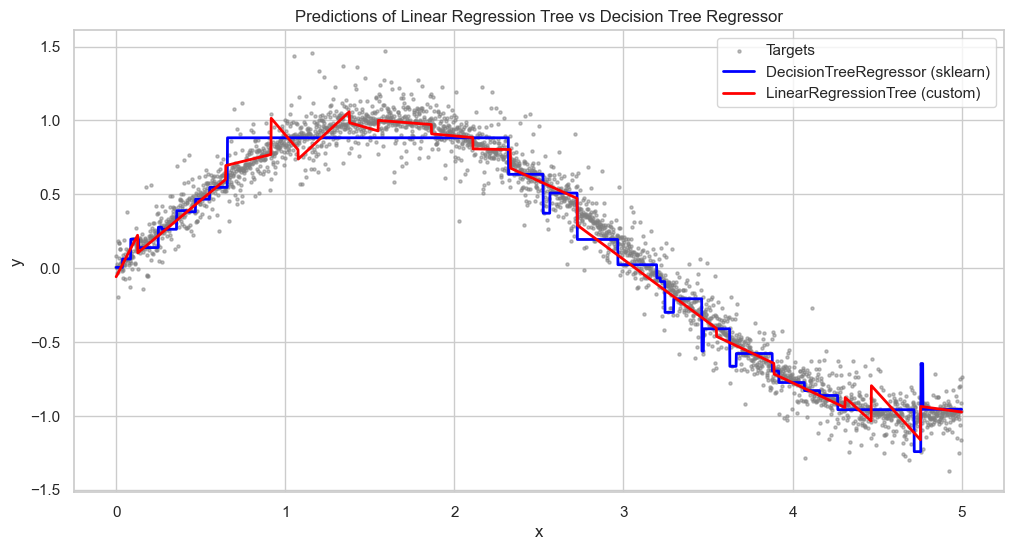

In [66]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x)

lrt_model = LinearRegressionTree(
    feature_types=["real"], max_depth=5, min_samples_split=10, min_samples_leaf=5, n_quantiles=10
)
lrt_model.fit(x_train, y_train)
y_pred_lrt = lrt_model.predict(x)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=5, label="Targets", alpha=0.5, color="gray")
plt.plot(x, y_pred_dt, label="DecisionTreeRegressor (sklearn)", color="blue", linewidth=2)
plt.plot(x, y_pred_lrt, label="LinearRegressionTree (custom)", color="red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Predictions of Linear Regression Tree vs Decision Tree Regressor")
plt.legend()
plt.show()

**Ответ:** Из плюсов кажется, что оно более монотонно, чем обычное дерево (это кстати зависит от некоторого рандома). Однако, судя по разнице, оно более изломано в локальных экстремумах, то есть сильнее реагирует на изменение направления функции (там, где би библиотечное наоборот выходит на плато). 

Вставьте что угодно, описывающее ваши впечатления от этого задания: